In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
## Use Inspector to get table names
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [8]:
## Use Inspector to see table structure for station
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [9]:
## Use Inspector to see table structure for measurements
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [10]:
# Save references to each table
station = Base.classes.station
measurement = Base.classes.measurement

In [11]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [12]:
# Find the most recent date in the data set.
session.query(measurement.date).order_by(measurement.date.desc()).first()

('2017-08-23',)

In [13]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
session.query(measurement).order_by(measurement.date.desc()).first()

# Calculate the date one year from the last date in data set.
query_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
# Sort the dataframe by date
query_dates = session.query(measurement).\
    filter(measurement.date > '2016-08-23').\
    order_by(measurement.date.desc()).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
list_dict=[]
for i in query_dates:
    list_dict.append(
        {"date": i.date,
         "prcp": i.prcp,
        }
        )
df = pd.DataFrame(list_dict)
df = df.rename(columns={'date': 'Date', 'prcp': 'Precipitation'})
print(df.head())



         Date  Precipitation
0  2017-08-23           0.00
1  2017-08-23           0.00
2  2017-08-23           0.08
3  2017-08-23           0.45
4  2017-08-22           0.00


In [14]:
df['Dates'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df.head()
#2017-08-23

,Date,Precipitation,Dates
0,2017-08-23,0.00,2017-08-23
1,2017-08-23,0.00,2017-08-23
2,2017-08-23,0.08,2017-08-23
3,2017-08-23,0.45,2017-08-23
4,2017-08-22,0.00,2017-08-22


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2223 entries, 0 to 2222
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           2223 non-null   object        
 1   Precipitation  2015 non-null   float64       
 2   Dates          2223 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 52.2+ KB


<Axes: xlabel='Date'>

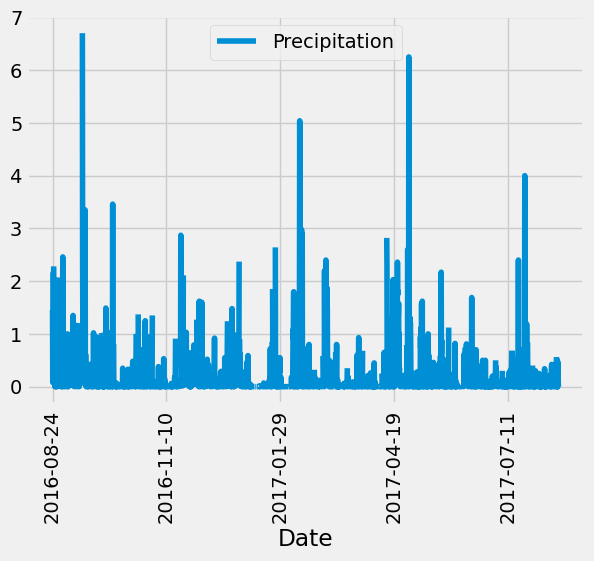

In [16]:
# Use Pandas Plotting with Matplotlib to plot the data
df=df.sort_values("Date")
df.plot(x='Date', y='Precipitation', rot=90)

In [17]:
# Use Pandas to calculate the summary statistics for the precipitation data
print(df.agg({'Precipitation':['count', 'mean', 'median', 'var', 'std', 'sem']}))

        Precipitation
count     2015.000000
mean         0.176462
median       0.020000
var          0.211865
std          0.460288
sem          0.010254


# Exploratory Station Analysis

In [18]:
# Design a query to calculate the total number of stations in the dataset
session.query(station.station).count()

9

In [19]:
## Match station columns from both tables, (station and measurement) obtained from csv files.
## Columns will match to allow for a join
session.query(station.station, measurement.station).all()

C:\Users\pauls\AppData\Local\Temp\ipykernel_27588\436602723.py:3: SAWarning: SELECT statement has a cartesian product between FROM element(s) "measurement" and FROM element "station".  Apply join condition(s) between each element to resolve.
  session.query(station.station, measurement.station).all()


[('USC00519397', 'USC00519397'),
 ('USC00519397', 'USC00519397'),
 ('USC00519397', 'USC00519397'),
 ('USC00519397', 'USC00519397'),
 ('USC00519397', 'USC00519397'),
 ('USC00519397', 'USC00519397'),
 ('USC00519397', 'USC00519397'),
 ('USC00519397', 'USC00519397'),
 ('USC00519397', 'USC00519397'),
 ('USC00519397', 'USC00519397'),
 ('USC00519397', 'USC00519397'),
 ('USC00519397', 'USC00519397'),
 ('USC00519397', 'USC00519397'),
 ('USC00519397', 'USC00519397'),
 ('USC00519397', 'USC00519397'),
 ('USC00519397', 'USC00519397'),
 ('USC00519397', 'USC00519397'),
 ('USC00519397', 'USC00519397'),
 ('USC00519397', 'USC00519397'),
 ('USC00519397', 'USC00519397'),
 ('USC00519397', 'USC00519397'),
 ('USC00519397', 'USC00519397'),
 ('USC00519397', 'USC00519397'),
 ('USC00519397', 'USC00519397'),
 ('USC00519397', 'USC00519397'),
 ('USC00519397', 'USC00519397'),
 ('USC00519397', 'USC00519397'),
 ('USC00519397', 'USC00519397'),
 ('USC00519397', 'USC00519397'),
 ('USC00519397', 'USC00519397'),
 ('USC0051

In [ ]:
## Ensure station IDs match with an inner join by filtering the JOIN query
same_order = session.query(station, measurement).filter(station.station == measurement.station).limit(100).all()

# Same as SQL Command:
# SQL
# SELECT *
# FROM station
# INNER JOIN measurement
# ON station.station = measurement.station

In [21]:

session.query(measurement.station).all()

[('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC00519397',),
 ('USC005193

In [22]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
most_active_stations = session.query(measurement.station, func.count(measurement.station)).\
    group_by(measurement.station).\
    order_by(func.count(measurement.station).desc()).all()
most_active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [23]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
results = session.query(
    func.min(measurement.tobs),
    func.max(measurement.tobs),
    func.avg(measurement.tobs)
).filter(measurement.station == 'USC00519281').all()

# Unpack the results
min_temp, max_temp, avg_temp = results[0]

print(f"Lowest Temperature: {min_temp}")
print(f"Highest Temperature: {max_temp}")
print(f"Average Temperature: {avg_temp}")

Lowest Temperature: 54.0
Highest Temperature: 85.0
Average Temperature: 71.66378066378067


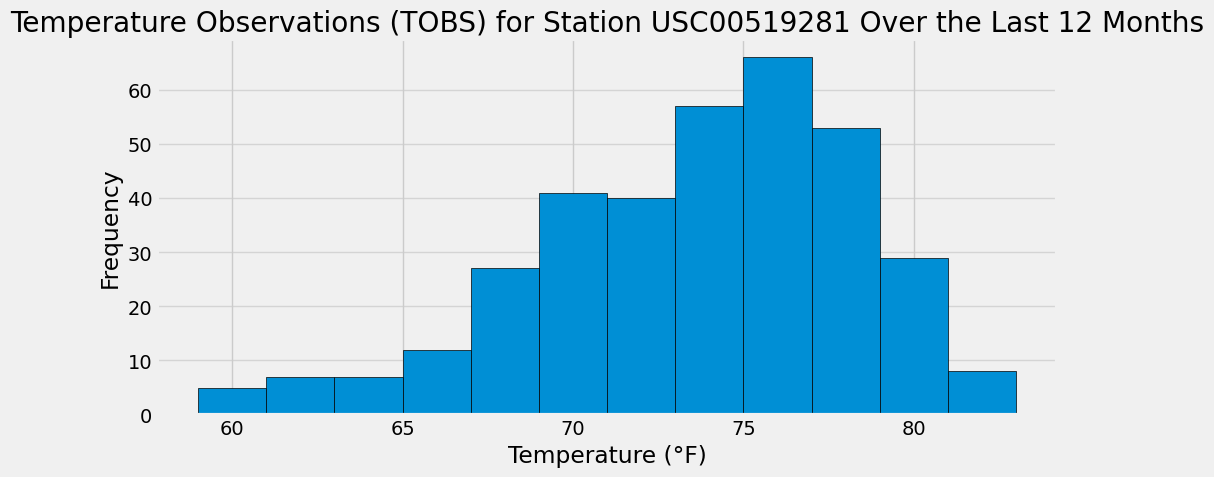

In [24]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
tobs_data = session.query(measurement.tobs).filter(measurement.station == 'USC00519281', measurement.date >= query_date)
tobs = [temp[0] for temp in tobs_data] 
df = pd.DataFrame(tobs, columns=['tobs'])
plt.figure(figsize=(10, 5))
plt.hist(df['tobs'], bins=12, edgecolor='black')
plt.title('Temperature Observations (TOBS) for Station USC00519281 Over the Last 12 Months')
plt.xlabel('Temperature (°F)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()

# Close Session

In [25]:
# Close Session
session.close()